In [1]:
!pip install --upgrade yasa


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import yasa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mne.filter import filter_data
sns.set(font_scale=1.2)

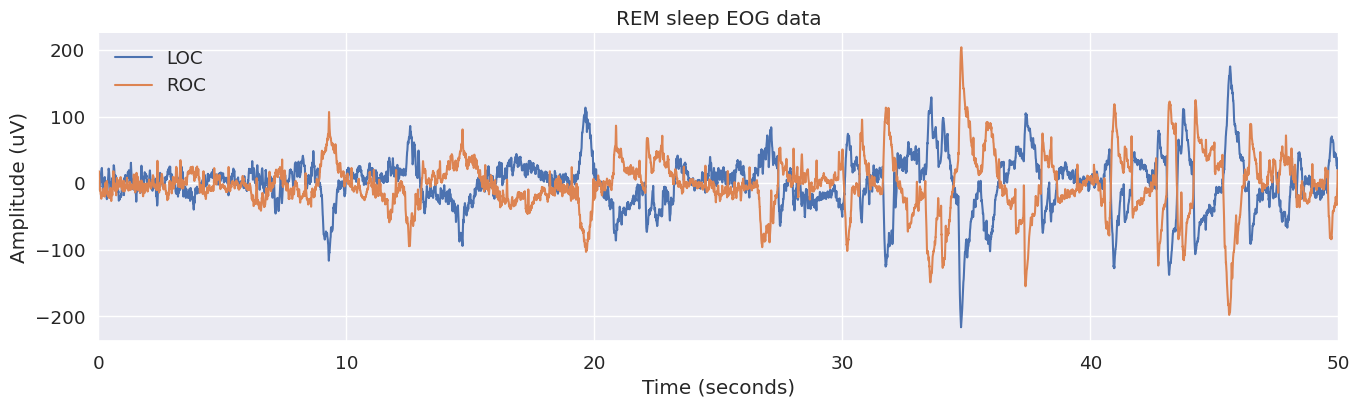

In [3]:
#/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')
data, sf, chan = file['data'], file['sf'], file['chan']

# Keep only 50 seconds of data
loc = data[0, 77000:89801]
roc = data[1, 77000:89801]

# Define sampling frequency and time vector
times = np.arange(loc.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(times, loc, label='LOC', lw=1.5)
plt.plot(times, roc, label='ROC', lw=1.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('REM sleep EOG data')
plt.legend(loc='best', frameon=False)
sns.despine()

In [4]:
#write a code to display the keys of a npz file. display each key in a loop and print the names

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')

# Print keys
for key in file.keys():
    print(key)




data
sf
chan


In [5]:
file['data'].T

array([[ -4.51770452,  -0.36630037],
       [ -1.0989011 ,   0.36630037],
       [ -2.80830281,  -1.83150183],
       ...,
       [-10.37851038,  -3.2967033 ],
       [ -9.64590965,  -2.07570208],
       [-10.37851038,  -1.58730159]])

In [6]:
#write commands to turn an npz file into a pandas dataframe. display the first 5 rows of the dataframe

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')

# Convert to dataframe
df = pd.DataFrame(file['data'].T, columns=file['chan'])
df['Time'] = np.arange(df.shape[0]) / file['sf']

# Display first 5 rows

df.head()

#explain df.shape[0] 






,LOC,ROC,Time
0,-4.517705,-0.366300,0.000000
1,-1.098901,0.366300,0.003906
2,-2.808303,-1.831502,0.007812
3,-4.761905,-5.250305,0.011719
4,-6.959707,-8.913309,0.015625


In [7]:

import pandas as pd
import mne
import numpy as np

#dataFile = pd.read_csv("/content/stimulant_mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
#url = 'https://www.dropbox.com/s/ttv6vxh3ys7q0ou/mindMonitor_2023-01-18--14-37-14.csv?dl=1'
url = 'https://www.dropbox.com/s/a5uwkqaq71mkrxp/mindMonitor_2023-02-17--18-29-44_choc_intervention.csv?dl=1'
urlmantrameditation = 'https://www.dropbox.com/s/z09umrre7qgg4ld/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv?dl=1'
urlmantra2 = 'https://www.dropbox.com/s/z0eoyhwinrep224/mindMonitor_2023-03-28--10-43-44_after_breakfast_baseline_mantra__3_intervention_breathfocus_4.csv?dl=1'
#dataFile = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv', skiprows=0, usecols=[*range(1,21)])
urlsleep = 'https://www.dropbox.com/s/hu50afgorep21c6/mindMonitor_2023-04-03--01-28-07_sleep.csv?dl=1'
#dfraw = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv')

#dfraw = pd.read_csv('/content/mindMonitor_2023-02-15--14-48-03_stiumant_limited_interventions.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
dfsraw = pd.read_csv(urlsleep)


dfs = dfsraw

In [8]:
dfs.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'AUX_LEFT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7',
       'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')

#load sleep staging

In [9]:
raw = mne.io.read_raw_fif('/workspaces/codespaces-jupyter/data/sub-02_mne_raw.fif', preload=True, verbose=False)
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

The channels are: ['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'EOG1', 'EOG2', 'EMG1']
The sampling frequency is: 100.0


<Raw | sub-02_mne_raw.fif, 9 x 294000 (2940.0 s), ~20.2 MB, data loaded>

In [10]:
#for the file raw, write a code to display the channels and sampling frequency

data = raw.get_data(start=0, stop=5)

data.T.shape



(5, 9)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


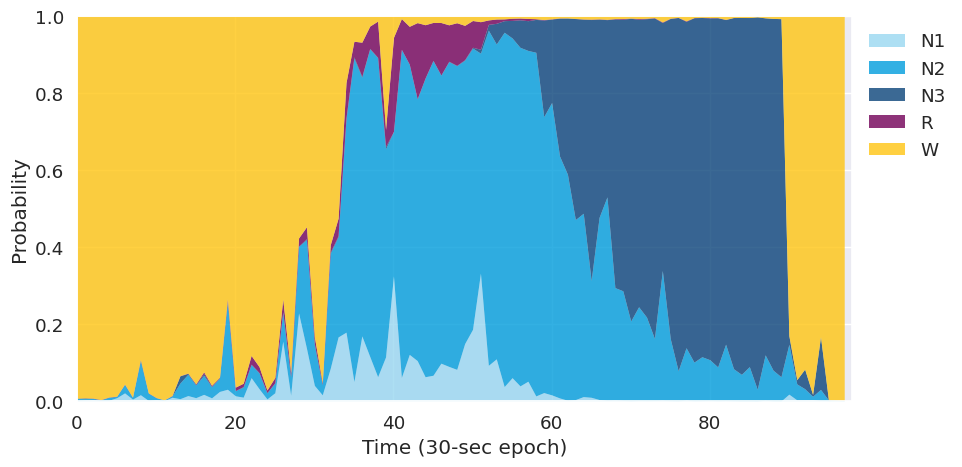

In [11]:
sls = yasa.SleepStaging(raw, eeg_name="C4", eog_name="EOG1", emg_name="EMG1", metadata=dict(age=21, male=False))
y_pred = sls.predict()
y_pred

sls.plot_predict_proba();


In [15]:
import numpy as np
import mne

# Import the dictionary
dictionary = {'TimeStamp': {0: '2023-02-23 08:01:50.701',
  1: '2023-02-23 08:01:50.798',
  2: '2023-02-23 08:01:50.798',
  3: '2023-02-23 08:01:50.800',
  4: '2023-02-23 08:01:50.800'},
 'Delta_TP9': {0: np.nan,
  1: 0.8932789112449511,
  2: 0.8932789112449511,
  3: 0.8932789112449511,
  4: 0.8932789112449511},
 'Delta_AF7': {0: np.nan,
  1: -0.062321571240896,
  2: -0.0734485722420289,
  3: -0.0734485722420289,
  4: -0.0734485722420289}}

# Get the values from the dictionary
values = dictionary.values()

# Convert the values to an array
data = np.array(values)

# # Check the shape of the array
# if data.ndim != 2:
#     raise ValueError('Data must be a 2D array of shape (n_channels, '
#                       'n_samples), got shape %s' % (data.shape,))

# # Create a list of channel names and types
# ch_names = ['Delta_TP9', 'Delta_AF7']
# ch_types = ['eeg'] * 2

# # Create an info object
# info = mne.create_info(ch_names=ch_names, sfreq=1000, ch_types=ch_types)

# # Create a raw array object
# raw = mne.io.RawArray(data, info)

data




array(dict_values([{0: '2023-02-23 08:01:50.701', 1: '2023-02-23 08:01:50.798', 2: '2023-02-23 08:01:50.798', 3: '2023-02-23 08:01:50.800', 4: '2023-02-23 08:01:50.800'}, {0: nan, 1: 0.8932789112449511, 2: 0.8932789112449511, 3: 0.8932789112449511, 4: 0.8932789112449511}, {0: nan, 1: -0.062321571240896, 2: -0.0734485722420289, 3: -0.0734485722420289, 4: -0.0734485722420289}]),
      dtype=object)

In [21]:
#turn the data into an mne raw object useing the mne.io.RawArray function

# Import the dictionary
dictionary = {'TimeStamp': {'2023-02-23 08:01:50.701',
    '2023-02-23 08:01:50.798',
    '2023-02-23 08:01:50.798',
    '2023-02-23 08:01:50.800',
    '2023-02-23 08:01:50.800'},
    'Delta_TP9': {np.nan,
    '0.8932789112449511',
    '0.8932789112449511',
    '0.8932789112449511',
    '0.8932789112449511'},
    'Delta_AF7': {np.nan,
    '-0.062321571240896',
    '-0.0734485722420289',
    '-0.0734485722420289',
    '-0.0734485722420289'}}

# Get the values from the dictionary
values = dictionary.values()

print ('values', values)

# Convert the values to an array
data = np.array(values)

print (data.shape)

# # Check the shape of the array
if data.ndim != 2:
    raise ValueError('Data must be a 2D array of shape (n_channels, '
                      'n_samples), got shape %s' % (data.shape,))
# Create a list of channel names and types
ch_names = ['Delta_TP9', 'Delta_AF7']
ch_types = ['eeg'] * 2

# Create an info object
info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)

# Create a raw array object
raw = mne.io.RawArray(data, info)

raw



values dict_values([{'2023-02-23 08:01:50.701', '2023-02-23 08:01:50.800', '2023-02-23 08:01:50.798'}, {nan, '0.8932789112449511'}, {nan, '-0.062321571240896', '-0.0734485722420289'}])
()


ValueError: Data must be a 2D array of shape (n_channels, n_samples), got shape ()

In [ ]:
data.info['sfreq'] = 256.0

# Add the data to the raw file
for key, value in dictionary.items():
    if key == 'TimeStamp':
        continue
    for time, data in value.items():
        raw.add_data(data, time=time, chan=key)

In [ ]:
raw = mne.io.Raw(fname='my_raw_file.txt')
# Set the sampling frequency
raw.info['sfreq'] = 256.0

# Add the data to the raw file
for key, value in dictionary.items():
    if key == 'TimeStamp':
        continue
    for time, data in value.items():
        raw.add_data(data, time=time, chan=key)

raw.save